# Correlations between speeding offenses and weather conditions

The idea of this project was to try to find correlations between speeding offenses and weather conditions. The steps below describe how I tried to achieve this.

## Install dependencies
Initially, install all required dependencies.

In [3]:
%pip install -r requirements.txt
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load data
Create a pandas dataframe using the local sqlite file.

In [4]:
import pandas as pd

df = pd.read_sql_table('offenses', 'sqlite:///data/data.sqlite')

## Correlations
To find correlations, firstly I calculated the Pearson correlation coefficient between the weather data and the speeding offenses. Afterwards, I grouped the weather conditions into 6 categories and counted the number of speeding offenses for each category. Lastly I counted the number of speeding offenses for each weather condition in relation to the number of days with that weather condition.

### Pearson correlation coefficient
This section show how I calculated the Pearson correlation coefficient and presents and discusses the results.

Below is how I Calculated the pearson correlation coefficient for the exceedance columns with the temperature, precipitation and wind speed columns

In [6]:
df['exceedance'].corr(df['temperature'], method='pearson')

0.025065619815280923

In [ ]:
df['exceedance'].corr(df['precipitation'], method='pearson')

-0.014784174460152422

In [ ]:
df['exceedance'].corr(df['wind speed'], method='pearson')

0.0038510883940356634

All of the above values are rather low and don't indicate a correlation between the weather and the speeding offenses. So up next I tried to find a correlation between the weather and the speeding offenses by counting the number of offenses per weather condition.

### Counting offenses per weather condition
In this section I counted the number of offenses per weather condition. The weather conditions are grouped into 6 categories, each representing an interval of the temperature, precipitation and wind speed values. The categories are:

- `cold`: temperature < 5°C
- `warm`: temperature >= 25°C
- `dry`: precipitation < 0.5mm
- `wet`: precipitation >= 2mm
- `calm`: wind speed < 5km/h
- `windy`: wind speed >= 25km/h

100782
Percentage of exceedances at cold temperatures: 15.14073028010847%
51923
Percentage of exceedances at warm temperatures: 7.800521306722152%
634076
Percentage of exceedances at dry weather: 95.25881301313784%
6685
Percentage of exceedances at wet weather: 1.0043041606886656%
48858
Percentage of exceedances at calm weather: 7.340058740901545%
99803
Percentage of exceedances at windy weather: 14.99365267751846%


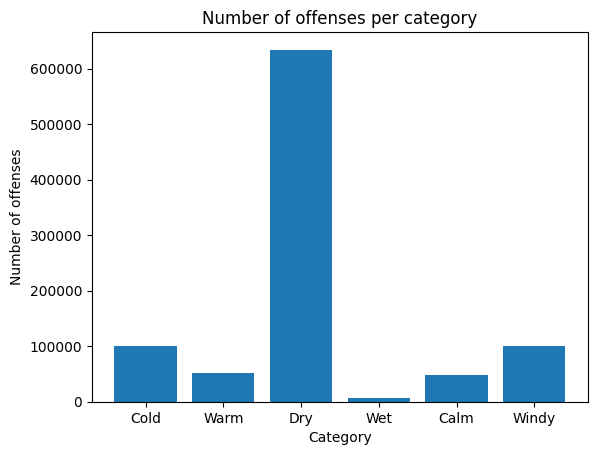

In [16]:
import matplotlib.pyplot as plt

all = len(df)
count_cold = len(df[(df['temperature'] < 5)])
print(count_cold)
print('Percentage of exceedances at cold temperatures: ' + str(count_cold / all * 100) + '%')

count_warm = len(df[(df['temperature'] >= 25)])
print(count_warm)
print('Percentage of exceedances at warm temperatures: ' + str(count_warm / all * 100) + '%')

count_dry = len(df[(df['precipitation'] < 0.5)])
print(count_dry)
print('Percentage of exceedances at dry weather: ' + str(count_dry / all * 100) + '%')

count_wet = len(df[(df['precipitation'] >= 2)])
print(count_wet)
print('Percentage of exceedances at wet weather: ' + str(count_wet / all * 100) + '%')

count_calm = len(df[(df['wind speed'] < 5)])
print(count_calm)
print('Percentage of exceedances at calm weather: ' + str(count_calm / all * 100) + '%')

count_windy = len(df[(df['wind speed'] >= 20)])
print(count_windy)
print('Percentage of exceedances at windy weather: ' + str(count_windy / all * 100) + '%')

# plot number of offenses per category
labels = ['Cold', 'Warm', 'Dry', 'Wet', 'Calm', 'Windy']
values = [count_cold, count_warm, count_dry, count_wet, count_calm, count_windy]

plt.bar(labels, values)
plt.title('Number of offenses per category')
plt.xlabel('Category')
plt.ylabel('Number of offenses')
plt.show()




The above results shows that with 95% almost all offenses happen in the `dry` category. This is not surprising since the weather in cologne is mostly dry. So I tried to find a correlation between the weather and the speeding offenses by counting the number of offenses per weather condition in relation to the number of days with that weather condition.

### Counting offenses per weather condition in relation to the number of days with that weather condition

To find a more meaningful relation between the weather and the speeding offenses I counted the number of offenses per weather condition in relation to the number of days with that weather condition

Percentage of offenses at cold temperatures: 5.793693318251275%
Percentage of offenses at warm temperatures: 3.670820253067041%
Percentage of offenses at dry weather: 5.269399882663907%
Percentage of offenses at wet weather: 4.637247569184742%
Percentage of offenses at calm weather: 6.359245159441647%
Percentage of offenses at windy weather: 4.315501538029919%


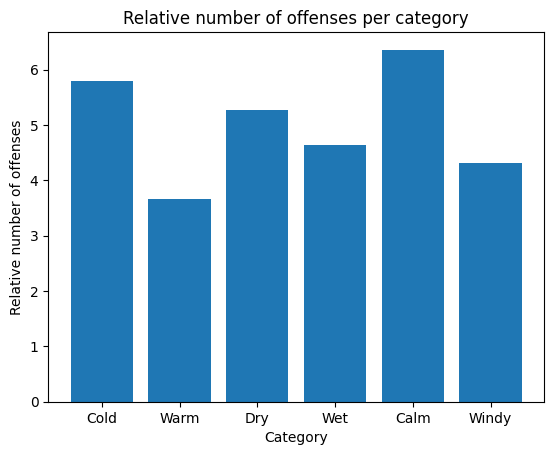

In [15]:
import matplotlib.pyplot as plt

# count number of days in cologne with percipation below 0.5mm
from meteostat import Point, Hourly
from datetime import datetime

start = datetime(2017, 1, 1)
end = datetime(2020, 12, 31)

cologne = Point(50.9381, 6.9569)
data = Hourly(cologne, start, end)
data = data.fetch()

count_cold_hours = len(data[(data['temp'] < 5)])
count_warm_hours = len(data[(data['temp'] >= 25)])
count_dry_hours = len(data[(data['prcp'] < 0.5)])
count_wet_hours = len(data[(data['prcp'] >= 2)])
count_calm_hours = len(data[(data['wspd'] < 5)])
count_windy_hours = len(data[(data['wspd'] >= 20)])

rel_cold = count_cold_hours / count_cold * 100
rel_warm = count_warm_hours / count_warm * 100
rel_dry = count_dry_hours / count_dry * 100
rel_wet = count_wet_hours / count_wet * 100
rel_calm = count_calm_hours / count_calm * 100
rel_windy = count_windy_hours / count_windy * 100

print('Percentage of offenses at cold temperatures: ' + str(rel_cold) + '%')
print('Percentage of offenses at warm temperatures: ' + str(rel_warm) + '%')
print('Percentage of offenses at dry weather: ' + str(rel_dry) + '%')
print('Percentage of offenses at wet weather: ' + str(rel_wet) + '%')
print('Percentage of offenses at calm weather: ' + str(rel_calm) + '%')
print('Percentage of offenses at windy weather: ' + str(rel_windy) + '%')

# plot number of offenses per category in relation to the number of days with the same weather
labels = ['Cold', 'Warm', 'Dry', 'Wet', 'Calm', 'Windy']
values = [rel_cold, rel_warm, rel_dry, rel_wet, rel_calm, rel_windy]

plt.bar(labels, values)
plt.title('Relative number of offenses per category')
plt.xlabel('Category')
plt.ylabel('Relative number of offenses')
plt.show()

These results do not show any significant difference between the `dry` and `wet` categories anymore and neither reveal any other correlation between the weather and the speeding offenses. This indicates that the `dry` category is overrepresented in the data and that none of the weather conditions examined above have a significant influence on the number of speeding offenses.